In [1]:
import pandas as pd
import numpy as np
import csv
import os
import time
from sklearn.manifold import TSNE

os.chdir('/san-data/usecase/magnet_g/misc/PCA_DATA_VIS') 
data = np.genfromtxt('new_datas2.csv', delimiter = ',', names = True, dtype = None)
df = pd.DataFrame(data)

In [2]:
df = df.drop(["Hour_editing_needed", "Date", "speed_lim1", 
              "Hour", "Minute", "Second", "latitude", "longitude", "ratio", "road_type",
              "algorithm", "lag_speed"], axis = 1)
df['Mode'] = np.where(df['lonG'] >= 0, 'Acceleration', 'Deceleration')
df = df.dropna(axis = 0, how = "all")
rndperm = np.random.permutation(df.shape[0])

### Five second

In [3]:
active_df = df[df.columns[9: 23]]

In [4]:
active_df1 = active_df.shift(periods = 1, axis = 0)
active_df1.columns = ['stop_ind1', 'stop_grp_cnt1', 'latG1', 'lonG1', 'speed1', 'ang_speed_gyro1', 'lon_delta1', 'inc_mileage1', 'avg_latG1',
                     'avg_latG_mag1', 'algorithmCurve_in_the_road1', 'algorithmLane_Change1', 'algorithmNormal_Driving1',
                     'algorithmNormal_Turn1']
active_df2 = active_df.shift(periods = 2, axis = 0)
active_df2.columns = ['stop_ind2', 'stop_grp_cnt2', 'latG2', 'lonG2', 'speed2', 'ang_speed_gyro2', 'lon_delta2', 'inc_mileage2', 'avg_latG2',
                     'avg_latG_mag2', 'algorithmCurve_in_the_road2', 'algorithmLane_Change2', 'algorithmNormal_Driving2',
                     'algorithmNormal_Turn2']
active_df3 = active_df.shift(periods = 3, axis = 0)
active_df3.columns = ['stop_ind3', 'stop_grp_cnt3', 'latG3', 'lonG3', 'speed3', 'ang_speed_gyro3', 'lon_delta3', 'inc_mileage3', 'avg_latG3',
                     'avg_latG_mag3', 'algorithmCurve_in_the_road3', 'algorithmLane_Change3', 'algorithmNormal_Driving3',
                     'algorithmNormal_Turn3']
active_df4 = active_df.shift(periods = 4, axis = 0)
active_df4.columns = ['stop_ind4', 'stop_grp_cnt4', 'latG4', 'lonG4', 'speed4', 'ang_speed_gyro4', 'lon_delta4', 'inc_mileage4', 'avg_latG4',
                     'avg_latG_mag4', 'algorithmCurve_in_the_road4', 'algorithmLane_Change4', 'algorithmNormal_Driving4',
                     'algorithmNormal_Turn4']

In [5]:
active_df = pd.concat([df["trip_number"], df["timestmp_local"], active_df, active_df1, active_df2, active_df3, active_df4], axis = 1).iloc[list(range(4, 50000, 5))]

In [6]:
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 70, n_iter = 300)
tsne_results = tsne.fit_transform(active_df.drop(["trip_number", "timestmp_local"], axis = 1))
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.095866
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.852838
[t-SNE] Error after 300 iterations: 0.852838
t-SNE done! Time elapsed: 404.069809914 seconds


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
df_tsne = active_df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

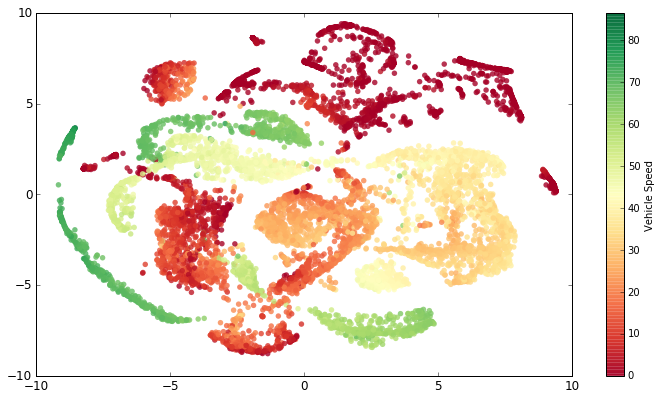

In [8]:
# Display speed
fig, ax = plt.subplots(figsize = (12, 6.5))
ax.axis([-10, 10, -10, 10])
p = ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], c = df_tsne['speed'], 
               s = 30, alpha = 0.8, lw = 0, cmap = plt.cm.get_cmap("RdYlGn"))
bar = plt.colorbar(p)
bar.set_label("Vehicle Speed")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [9]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_tsne.ix[(df_tsne['speed'] <= 10) & (df_tsne['x-tsne'] > 5) & (df_tsne['x-tsne'] < 10) & (df_tsne['y-tsne'] > -1) & (df_tsne['y-tsne'] < 2.5)]

trip_number                timestmp_local  \
4      0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:39:12.032000065   
9      0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:39:17.006000042   
14     0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:39:22.031000137   
84     0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:40:32.026000261   
89     0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:40:37.019000292   
94     0003C787D1A840B2BE71866A325B49B300   2016-3-12 13:40:42.02699995   
99     0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:40:47.039000034   
104    0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:40:52.006000042   
109    0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:40:57.006999969   
199    0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:42:27.009000063   
214    0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:42:42.023999691   
219    0003C787D1A840B2BE71866A325B49B300  2016-3-12 13:42:47.029999971   
254    0004EA2FEAAF48A0823BA55E34785FD600  2016-3-12 19:53:5.0299999714   
639    0004EA2FEAAF48A0823BA55E34785FD600  2016-3-12 19:59:30.032000065   
644    0004EA2FEAAF48A0823BA55E34785FD600  2016-3-12 19:59:35.036999941   
649    0004EA2FEAAF48A0823BA55E34785FD600  2016-3-12 19:59:40.002999783   
654    0004EA2FEAAF48A0823BA55E34785FD600  2016-3-12 19:59:45.009999752   
659    0004EA2FEAAF48A0823BA55E34785FD600  2016-3-12 19:59:50.016000032   
664    0004EA2FEAAF48A0823BA55E34785FD600  2016-3-12 19:59:55.022000074   
714    0004EA2FEAAF48A0823BA55E34785FD600   2016-3-12 20:0:45.013999939   
719    0004EA2FEAAF48A0823BA55E34785FD600   2016-3-12 20:0:50.021000385   
724    0004EA2FEAAF48A0823BA55E34785FD600    2016-3-12 20:0:55.02699995   
2599   0060DE81509044128A13F2035E055F2D00   2016-3-17 0:36:33.013999939   
5524   00B5E69F8A4545F496F13A024A5D72ED00    2016-3-12 18:6:47.02699995   
5959   00CC11D1C51443D2AA3F584CCF3CA17200   2016-3-12 11:35:14.04700017   
5964   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:19.039000034   
5969   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:24.029999971   
5974   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:29.031000137   
5979   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:34.023999691   
5984   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:39.016000032   
5989   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:44.022000074   
5994   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:49.011000156   
5999   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:54.012000322   
6004   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:35:59.002000093   
6009   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:36:4.0009999275   
6014   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:36:9.0320000648   
6019   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:36:14.036000013   
6024   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:36:19.019000292   
6029   00CC11D1C51443D2AA3F584CCF3CA17200  2016-3-12 11:36:24.016000032   
6659   00DD2D6CF91144CA833F4759040F754A00    2016-3-7 17:10:59.03399992   
6664   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:4.0080001354   
6669   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:9.0130000114   
6674   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:14.019000292   
6679   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:19.029000044   
6684   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:24.002999783   
6689   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:29.016999722   
6704   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:44.016000032   
6709   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:49.033000231   
6714   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:54.000999928   
6719   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:11:59.013000011   
6724   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:12:4.0220000744   
6729   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17:12:9.0429999828   
6734   00DD2D6CF91144CA833F4759040F754A00   2016-3-7 17

In [82]:
df_tsne.loc[df_tsne['trip_number'] == "00A5B2C4E9254172BE08387115D195FA00"]

trip_number               timestmp_local  \
4419  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:8.0220000744   
4424  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:13.002999783   
4429  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:18.016000032   
4434  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:23.039000034   
4439  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:28.015000105   
4444  00A5B2C4E9254172BE08387115D195FA00    2016-3-13 8:56:33.0400002   
4449  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:38.013000011   
4454  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:43.009000063   
4459  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:48.028000355   
4464  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:53.028000355   
4469  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:56:58.009000063   
4474  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:57:3.0350003242   
4479  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:57:8.0150001049   
4484  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 8:57:13.03399992   
4489  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:57:18.006999969   
4494  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:57:23.033000231   
4499  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:57:28.009999752   
4504  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 8:57:33.03399992   
4509  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:57:38.012000322   
4514  00A5B2C4E9254172BE08387115D195FA00    2016-3-13 8:57:43.0400002   
4519  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:57:48.013000011   
4524  00A5B2C4E9254172BE08387115D195FA00  2016-3-13 8:57:53.033000231   
4529  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:3:48.000999928   
4534  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:3:53.015000105   
4539  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:3:58.029999971   
4544  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:3.0629999638   
4549  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:12.023999691   
4554  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:20.009000063   
4559  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:27.013000011   
4564  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:32.019000292   
4569  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:37.010999918   
4574  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:42.032000065   
4579  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:47.000999928   
4584  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:52.013000011   
4589  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:4:57.022000074   
4594  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:5:2.0080001354   
4599  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:5:7.0069999695   
4604  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:5:12.009999752   
4609  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:5:34.026000261   
4614  00A5B2C4E9254172BE08387115D195FA00     2016-3-13 9:5:39.0400002   
4619  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:5:44.042999983   
4624  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:5:49.004000187   
4629  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:5:54.012000322   
4634  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:5:59.059000015   
4639  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:6:4.0160000324   
4644  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:6:9.0350003242   
4649  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:6:14.000999928   
4654  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:6:19.012000322   
4659  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:6:24.016999722   
4664  00A5B2C4E9254172BE08387115D195FA00    2016-3-13 9:6:29.02699995   
4669  00A5B2C4E9254172BE08387115D195FA00     2016-3-13 9:6:34.0400002   
4674  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:6:39.002000093   
4679  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:6:44.004000187   
4684  00A5B2C4E9254172BE08387115D195FA00   2016-3-13 9:6:49.013999939   
4689  00A5B2C4

In [51]:
df_tsne.ix[(df_tsne['speed'] >= 60) & (df_tsne['x-tsne'] > -5) & (df_tsne['x-tsne'] < 0) & (df_tsne['y-tsne'] > -5) & (df_tsne['y-tsne'] < 0)]

trip_number  stop_ind  stop_grp_cnt      latG  \
1059   0014F0EFEE9F46F39F396C8376B0958600         0             0  0.003180   
1069   0014F0EFEE9F46F39F396C8376B0958600         0             0 -0.028292   
1074   0014F0EFEE9F46F39F396C8376B0958600         0             0 -0.072300   
1079   0014F0EFEE9F46F39F396C8376B0958600         0             0 -0.052729   
1084   0014F0EFEE9F46F39F396C8376B0958600         0             0  0.073145   
1089   0014F0EFEE9F46F39F396C8376B0958600         0             0 -0.017204   
1094   0014F0EFEE9F46F39F396C8376B0958600         0             0 -0.020041   
1114   0014F0EFEE9F46F39F396C8376B0958600         0             0  0.127470   
1119   0014F0EFEE9F46F39F396C8376B0958600         0             0  0.084456   
1184   0014F0EFEE9F46F39F396C8376B0958600         0             0 -0.073399   
1189   0014F0EFEE9F46F39F396C8376B0958600         0             0  0.033421   
1194   0014F0EFEE9F46F39F396C8376B0958600         0             0 -0.021870   
1199   0014F0EFEE9F46F39F396C8376B0958600         0             0  0.024493   
1204   0014F0EFEE9F46F39F396C8376B0958600         0             0  0.008708   
1614   0060DE81509044128A13F2035E055F2D00         0             0  0.050071   
3094   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.025610   
3099   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.016801   
3104   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.002069   
3109   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.020942   
3129   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.033725   
3134   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.001798   
3139   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.011292   
3144   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.004442   
3149   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.004404   
3154   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.015420   
3159   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.031231   
3164   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.032684   
3169   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.007369   
3174   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.012713   
3179   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.023663   
3184   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.008572   
3189   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.016474   
3194   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.012039   
3199   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.043718   
3209   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.008864   
3214   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.021257   
3249   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.077013   
3254   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.057326   
3274   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.018441   
3279   00707AE225EC4CBF805BF50687EB9A7100         0             0 -0.296405   
3304   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.000794   
3314   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.003750   
3319   00707AE225EC4CBF805BF50687EB9A7100         0             0  0.001704   
3339   007F9968242E46B7B643AD5F7CAA26D800         0             0 -0.026830   
3344   007F9968242E46B7B643AD5F7CAA26D800         0             0 -0.024982   
3349   007F9968242E46B7B643AD5F7CAA26D800         0             0  0.011541   
3354   007F9968242E46B7B643AD5F7CAA26D800         0             0  0.008910   
3359   007F9968242E46B7B643AD5F7CAA26D800         0             0  0.031150   
3364   007F9968242E46B7B643AD5F7CAA26D800         0             0  0.083988   
3379   007F9968242E46B7B643AD5F7CAA26D800         0             0  0.006522   
3

### First try

In [ ]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

In [30]:
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 50, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], list(df)[1:6] + list(df)[7: 21]].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.044671
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.087672
[t-SNE] Error after 300 iterations: 1.087672
t-SNE done! Time elapsed: 524.2421998977661 seconds


In [31]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

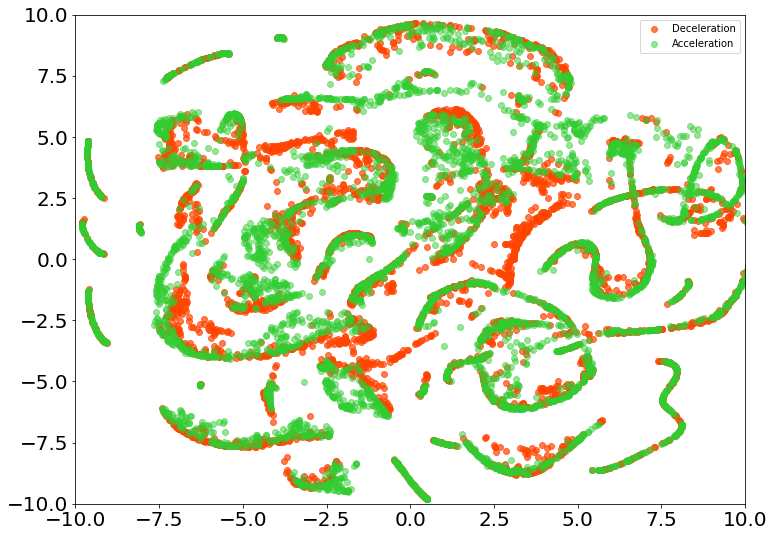

In [43]:
# Display acceleration / deceleration
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize = (12, 9))
ax.axis([-10, 10, -10, 10])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Deceleration'), label = "Deceleration", 
           color = "orangered", alpha = 0.7)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Acceleration'), label = "Acceleration", 
           color = "limegreen", alpha = 0.5)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

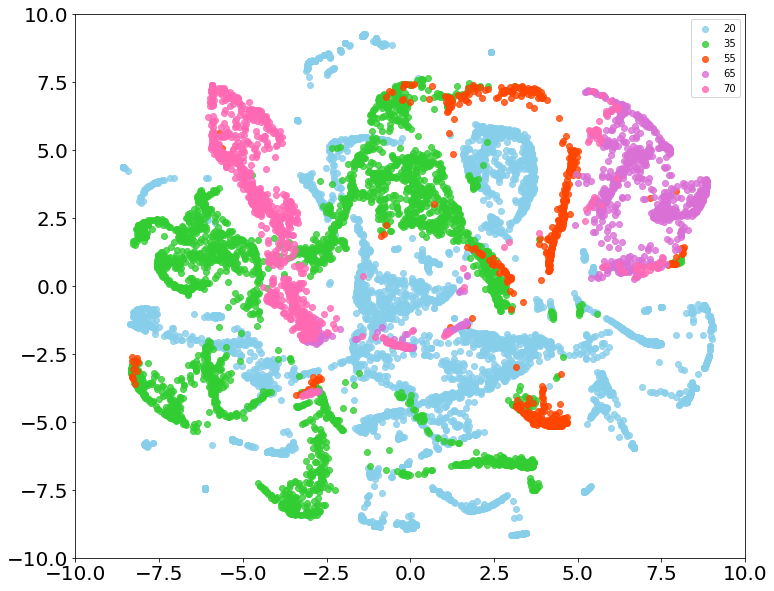

In [35]:
# Display speed_lim2
fig, ax = plt.subplots(figsize = (12, 10))
ax.axis([-10, 10, -10, 10])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 20),
           label = "20", color = "skyblue", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 35), 
           label = "35", color = "limegreen", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 55),
           label = "55", color = "orangered", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 65),
           label = "65", color = "orchid", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 70),
           label = "70", color = "hotpink", alpha = 0.8)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

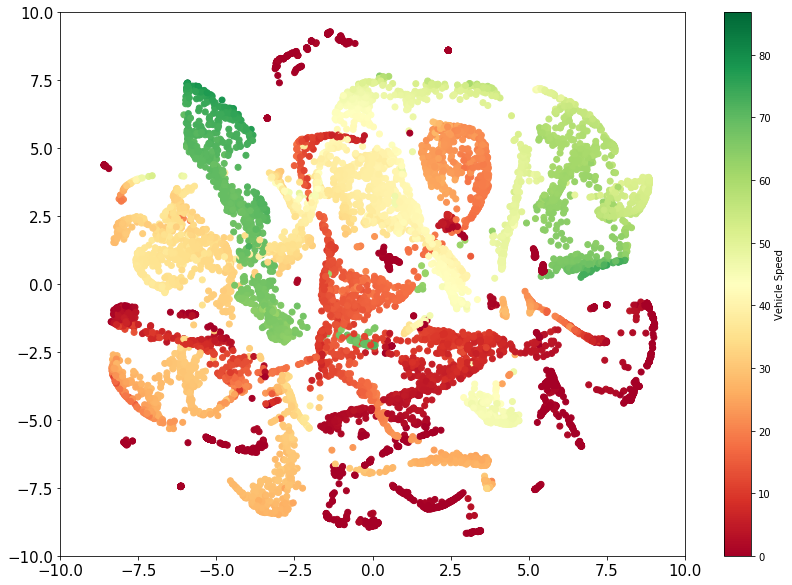

In [36]:
# Display speed
fig, ax = plt.subplots(figsize = (14, 10))
ax.axis([-10, 10, -10, 10])
p = ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], c = df_tsne['speed'], cmap = plt.cm.get_cmap("RdYlGn"))
bar = plt.colorbar(p)
bar.set_label("Vehicle Speed")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [37]:
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], 
                                         list(df[['latG', 'lonG', 'ang_speed_gyro', 'avg_latG', 'avg_latG_mag']])].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.018974
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.187232
[t-SNE] Error after 300 iterations: 1.187232
t-SNE done! Time elapsed: 519.6201002597809 seconds


In [38]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

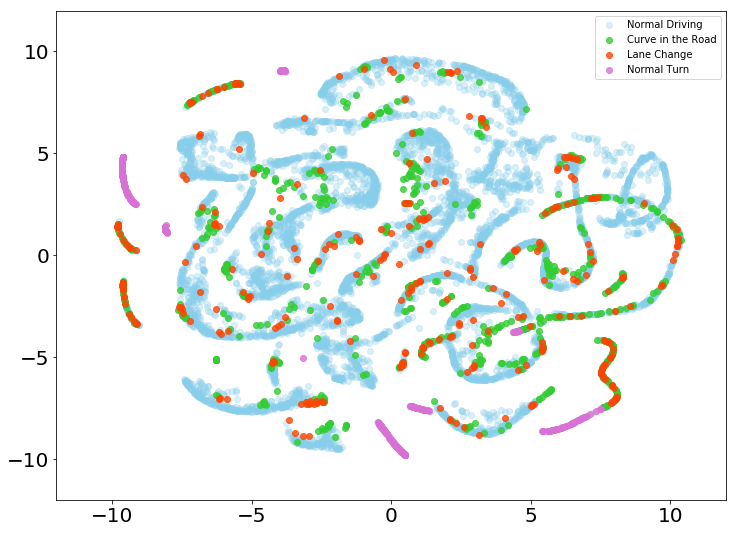

In [39]:
# Display algorithm: Curve in the road, Lane Change, Normal Driving, 
fig, ax = plt.subplots(figsize = (12, 9))
ax.axis([-12, 12, -12, 12])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmNormal_Driving'] == 1),
           label = "Normal Driving", color = "skyblue", alpha = 0.3)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmCurve_in_the_road'] == 1), 
           label = "Curve in the Road", color = "limegreen", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmLane_Change'] == 1),
           label = "Lane Change", color = "orangered", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmNormal_Turn'] == 1),
           label = "Normal Turn", color = "orchid", alpha = 0.8)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

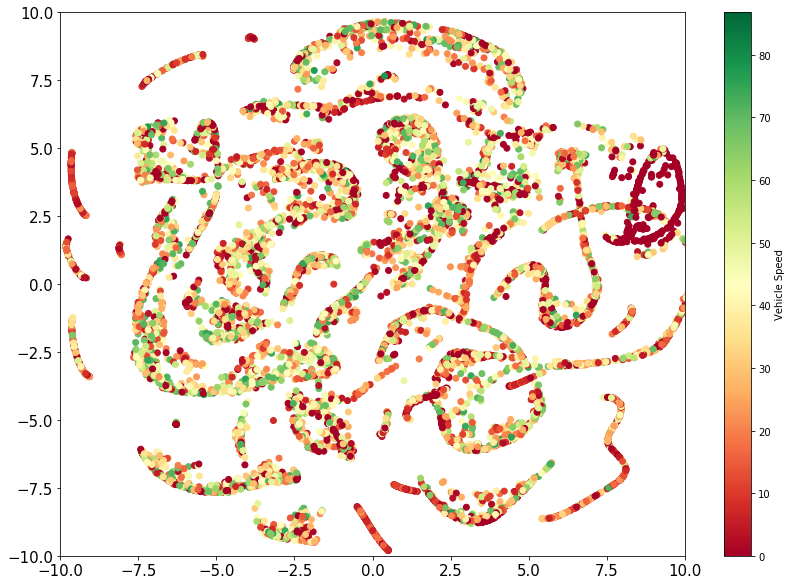

In [42]:
# Display speed
fig, ax = plt.subplots(figsize = (14, 10))
ax.axis([-10, 10, -10, 10])
p = ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], c = df_tsne['speed'], cmap = plt.cm.get_cmap("RdYlGn"))
bar = plt.colorbar(p)
bar.set_label("Vehicle Speed")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### TSNE vs PCA
https://www.kaggle.com/vimary/tsne-vs-pca

In [45]:
df = df.drop(["trip_number", "timestmp_local", "Hour_editing_needed", "Date", "speed_lim1", 
              'road_typeBusiness_District', 'road_typeFreeway', 'road_typeResidential_Road',
              "Hour", "Minute", "Second", "latitude", "longitude", "ratio", "road_type"], axis = 1)
df['Mode'] = np.where(df['lonG'] >= 0, 'Acceleration', 'Deceleration')
df = df.dropna(axis = 0, how = "all")

In [46]:
features = ['traffic_den', 'avg_speed', 'stop_ind', 'stop_grp_cnt', 'latG', 'lonG', 'speed',
            'ang_speed_gyro', 'lon_delta', 'inc_mileage', 'avg_latG', 'avg_latG_mag']
targets = ['speed_lim2']

Normalizing dataset with standard scaler. Mean of transformed features will be close to zero, and standard deviation also very close to 1.

In [47]:
# Basic
import numpy as np
import pandas as pd
# Plots
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Populating the interactive namespace from numpy and matplotlib


In [48]:
df_norm = df.copy()
df_norm[features] = StandardScaler().fit(df[features]).transform(df[features])

Learning TSNE with 2 components and PCA with default number.

In [53]:
X_tsne = TSNE(learning_rate = 500, perplexity = 50, n_components = 2, verbose = 1).fit_transform(df_norm[features][: 10000].values)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.003781
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.141008
[t-SNE] Error after 300 iterations: 1.141008


In [54]:
X_pca = PCA().fit_transform(df_norm[features][:10000].values)

Let's plot how pairs of 5 speed limits are divided in tsne 2D layout. Not very successful.

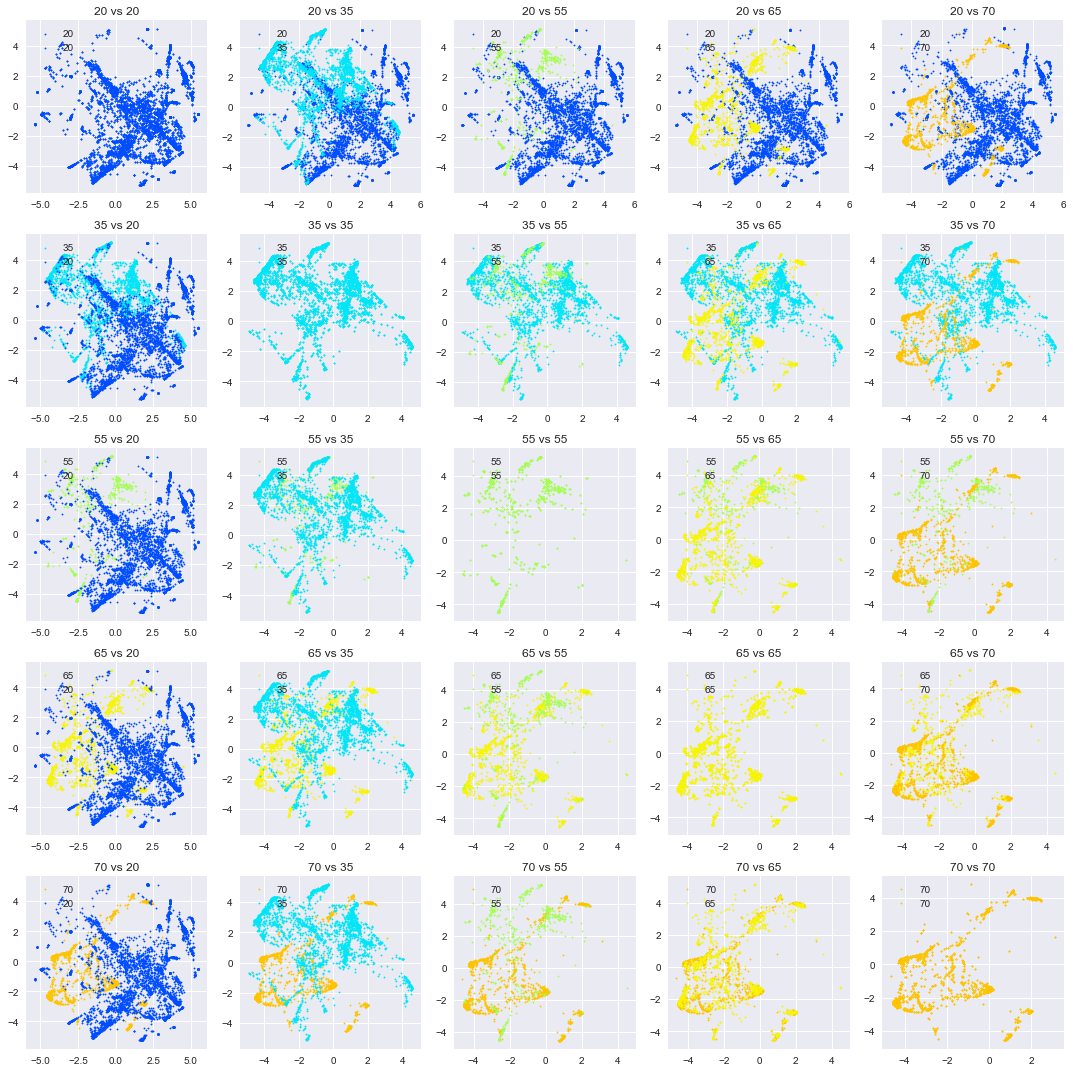

In [55]:
fig = figure(figsize=(15, 15))

cmap = plt.get_cmap('jet')
speed_lim = df['speed_lim2'][:10000].unique()

rows, cols = 5, 5
num = 1
for row, t1_id in zip(range(rows), speed_lim):
    for col, t2_id in zip(range(cols), speed_lim):
        subplot(rows, cols, num)
        X_i = X_tsne[np.where(df['speed_lim2'][:10000] == t1_id)[0]]
        X_j = X_tsne[np.where(df['speed_lim2'][:10000] == t2_id)[0]]
        scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / 100), s = 2)
        scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / 100), s = 2)
        title(str(t1_id) + ' vs ' + str(t2_id))
        legend([str(t1_id), str(t2_id)], loc = 2)
        num += 1
fig.tight_layout()

All pairs are not divided nor by TSNE and PCA.

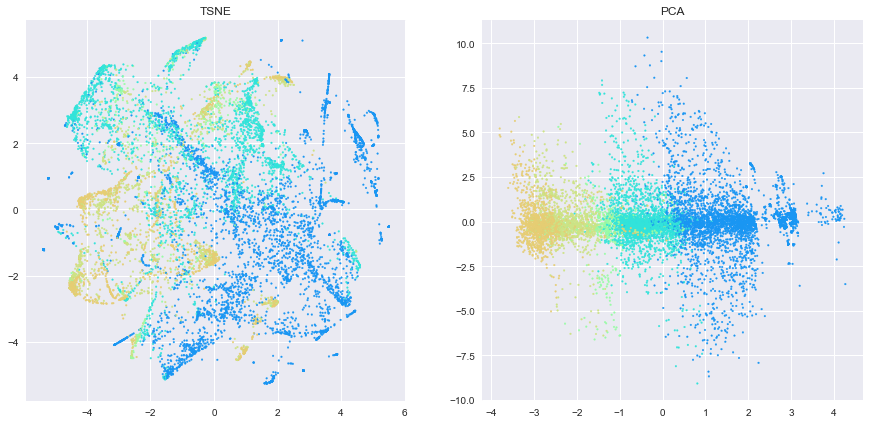

In [56]:
figure(figsize=(15, 7))
cmap = plt.get_cmap('rainbow')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['speed_lim2'][:10000] / 100), s = 3)
title('TSNE')

subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['speed_lim2'][:10000] / 100), s = 3)
title('PCA')

Layout is still not that good in detecting speed limit categories.

In [57]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans_tsne = KMeans(n_clusters = num_clusters).fit(X_tsne)
kmeans_pca = KMeans(n_clusters = num_clusters).fit(X_pca)

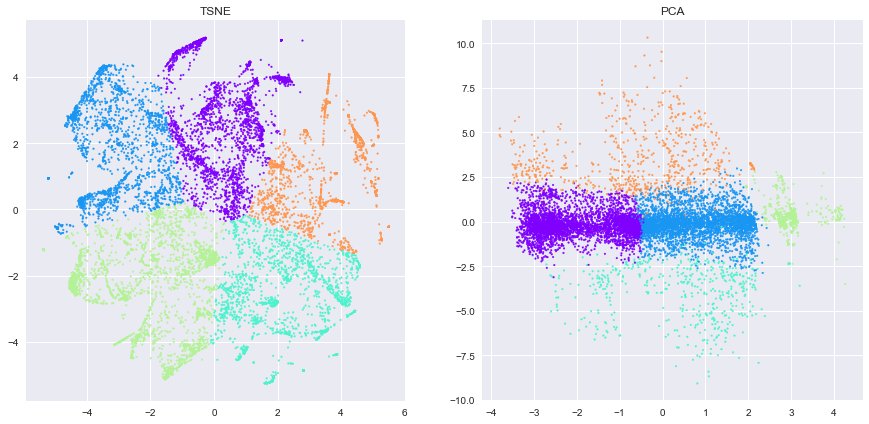

In [58]:
figure(figsize=(15, 7))
cmap = plt.get_cmap('rainbow')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters), s = 3)
title('TSNE')

subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(kmeans_pca.labels_ / num_clusters), s = 3)
title('PCA')

In [59]:
df_norm['tsne_cluster'] = 0
df_norm['tsne_cluster'][:10000] = kmeans_tsne.labels_
df_norm['pca_cluster'] = 0
df_norm['pca_cluster'][:10000] = kmeans_pca.labels_
df_tsne_mean = df_norm[: 10000].groupby('tsne_cluster').mean()
df_pca_mean = df_norm[: 10000].groupby('pca_cluster').mean()

C:\Users\WGU9\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\WGU9\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


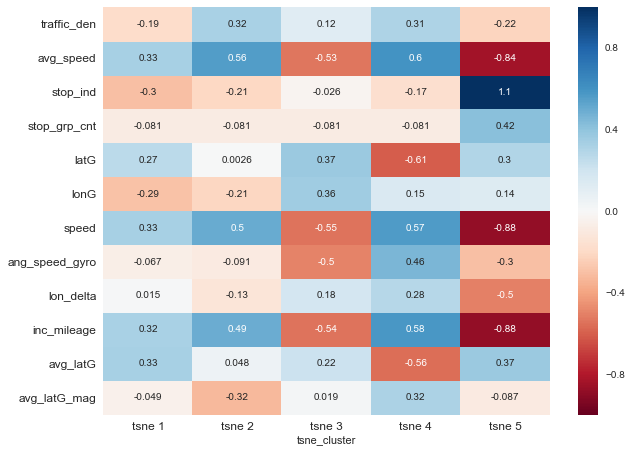

In [60]:
import seaborn as sns
figure(figsize = (10, 7.5))
ax = sns.heatmap(df_tsne_mean[features].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['tsne ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=12);
ax.set_yticklabels(features[::-1], rotation=0, fontsize=12)

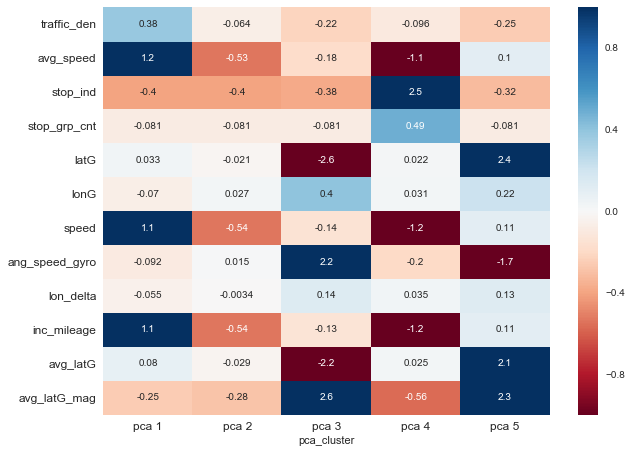

In [61]:
figure(figsize = (10, 7.5))
ax = sns.heatmap(df_pca_mean[features].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['pca ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=12);
ax.set_yticklabels(features[::-1], rotation=0, fontsize=12)

Above there are mean values of different traffic and speed metrics for each cluster.

Both TSNE and PCA distinguish similar clusters: 